<a href="https://colab.research.google.com/github/BrunoSlamek/Data_Science/blob/master/boston_crime_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of crimes in Boston, between 2015 to 2018

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. The Records begin in June 14, 2015 and continue to September 3, 2018.


---

In this analysis, we will check the crimes by the districts, the amount per week and months, and we will also check the most popular crime.



In [31]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from collections import Counter
from folium.plugins import HeatMap

plt.style.use("fivethirtyeight")

In [32]:
# Reading the file and showing the first lines
df = pd.read_csv('/content/crime.csv', encoding='latin-1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [33]:
# Changing variable names
df.rename(columns={'INCIDENT_NUMBER': 'NUMBER',
                   'OFFENSE_CODE': 'CODE',
                   'REPORTING_AREA': 'AREA',
                   'OFFENSE_CODE_GROUP': 'GROUP',
                   'OFFENSE_DESCRIPTION': 'DESCRIPTION',
                   'OCCURRED_ON_DATE': 'DATE',
                   'DAY_OF_WEEK': 'WEEK'}, inplace = True)
df.head(5)

,NUMBER,CODE,GROUP,DESCRIPTION,DISTRICT,AREA,SHOOTING,DATE,YEAR,MONTH,WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


# **Exploratory analysis**


In [34]:
"""
Data investigation.
function to return the main information from our beginning
"""
def data_inv(df):
    print(f'Rows and columns: {df.shape}')
    print(f'Database variables: {df.shape[1]}')
    print('-' * 33)
    print('Dataset columns: \n')
    print(df.columns)
    print('-' * 33)
    print('Datatype of each column: \n')
    print(df.dtypes)
    print('-' * 33)
    print('Missing rows in each column: \n')
    null = df.isnull().sum()
    print(null[null > 0])
data_inv(df)

Rows and columns: (319073, 17)
Database variables: 17
---------------------------------
Dataset columns: 

Index(['NUMBER', 'CODE', 'GROUP', 'DESCRIPTION', 'DISTRICT', 'AREA',
       'SHOOTING', 'DATE', 'YEAR', 'MONTH', 'WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')
---------------------------------
Datatype of each column: 

NUMBER          object
CODE             int64
GROUP           object
DESCRIPTION     object
DISTRICT        object
AREA            object
SHOOTING        object
DATE            object
YEAR             int64
MONTH            int64
WEEK            object
HOUR             int64
UCR_PART        object
STREET          object
Lat            float64
Long           float64
Location        object
dtype: object
---------------------------------
Missing rows in each column: 

DISTRICT      1765
SHOOTING    318054
UCR_PART        90
STREET       10871
Lat          19999
Long         19999
dtype: int64


In [35]:
# Interesting information
max_street_crime = df['STREET'].value_counts().index[0]
max_year_crime = df['YEAR'].value_counts().index[0]
max_hour_crime = df['HOUR'].value_counts().index[0]
max_day_crime = df['WEEK'].value_counts().index[0]

month = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

print('Street with higher occurrence of crimes:', max_street_crime)
print('Year with highest crime occurrence:', max_year_crime)
print('Hour with highest crime occurrence:', max_hour_crime)
print('Day with highest crime occurrence:', max_day_crime)

Street with higher occurrence of crimes: WASHINGTON ST
Year with highest crime occurrence: 2017
Hour with highest crime occurrence: 17
Day with highest crime occurrence: Friday


Before going into more detail, we have some important information, such as the street with the highest number of occurrences, year, day and time. Next, we'll check and compare with the history.

Values per week: 
Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: WEEK, dtype: int64
--------------------------------


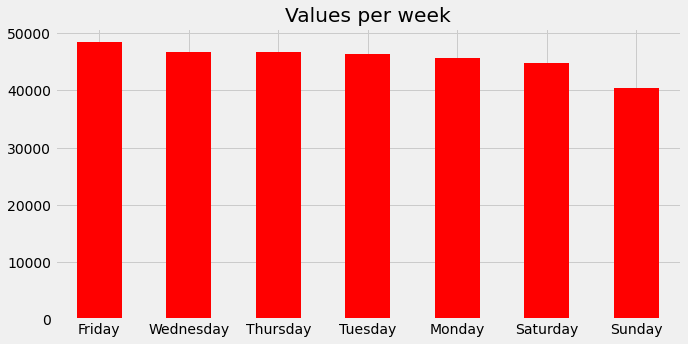

In [36]:
# values per week
def week(df):
    print("Values per week: ")
    print(df.WEEK.value_counts())
    print('-' * 32)
    df['WEEK'].value_counts().plot.bar(figsize=(10,5), rot=0,
                                              grid=True,
                                              title='Values per week',
                                              color='red');
week(df) 

The graph above shows the occurrences by day of the week, we see a high level of occurrence on Friday.

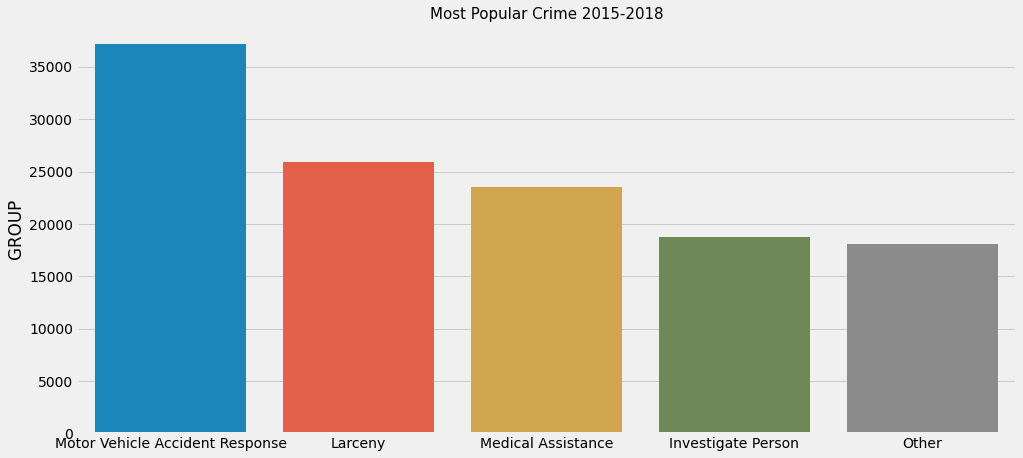

In [37]:
# Chart with five most popular crimes since 2015 to 2018
crime = df.GROUP.value_counts() 
crime.head()
crime = crime.to_frame()
plt.figure(figsize=(15,7))
sns.barplot(x=crime.index[:5],y='GROUP', data=crime.head())
plt.title('Most Popular Crime 2015-2018',fontsize=15)
plt.show()

With the chart above, we see that the largest number of incidents since 2015 is Response to vehicle accidents with a long difference between Larceny.

Values per district: 

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64
------------------------------


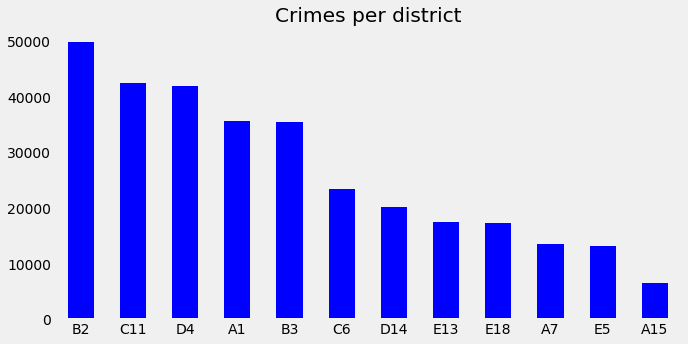

In [38]:
# crimes by district
def district(df):
    print("Values per district: \n")
    print(df.DISTRICT.value_counts())
    print('-' * 30)
    df['DISTRICT'].value_counts().plot.bar(figsize=(10,5), rot=0,
                                           grid=False,
                                           title='Crimes per district',
                                           color='blue')
district(df)

This analysis makes us realize the difference in reports between the districts.

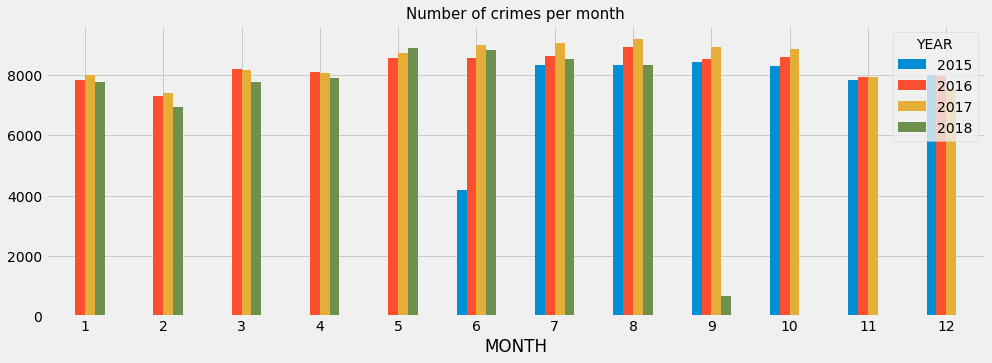

In [39]:
# Number of crimes per month
df.groupby(['YEAR','MONTH'])['GROUP'].agg('count').unstack('YEAR')
fig,ax=plt.subplots(figsize=(15,5))
df.groupby(['MONTH','YEAR'])['GROUP'].agg('count').unstack().plot(kind='bar',ax=ax)
plt.xticks(rotation=360)
plt.title("Number of crimes per month", fontsize=15)
plt.grid(True)

In the chart above, we have an analysis of the four years. 2015-2018. Where it shows us the total number of occurrences per month each year. We can see that the 2016 increase comes from month five. And in 2018, it started with the large number of occurrences and in the month nine a smaller number.


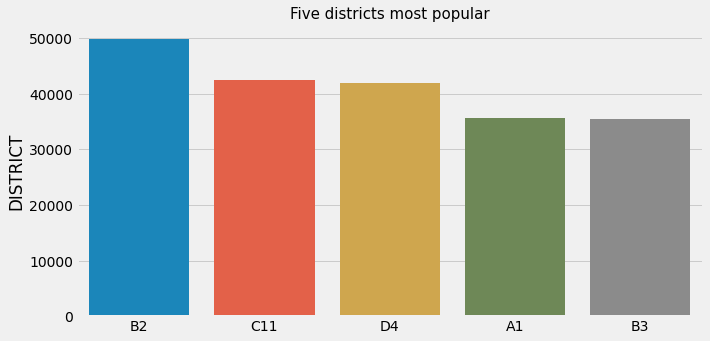

In [40]:
# Five of the districts with the highest number of crimes
district2 = df.DISTRICT.value_counts() 
district2.head()
district2 = district2.to_frame()
plt.figure(figsize=(10,5))
sns.barplot(x=district2.index[:5],y='DISTRICT', data=district2.head())
plt.title('Five districts most popular',fontsize=15)
plt.show()

With the graphs above, we can see the large number of occurrences in district B2. We also noticed that D4 and C11 have a small difference of 45 crimes. Then, we confirm that between B3 and A1 there is a difference of 18 crimes.

In [41]:
# Difference between districts
df2 = df[df['DISTRICT']=='B2']
df3 = df[df['DISTRICT']=='D4']

max_in_b2 = df2.GROUP.value_counts().index[0]
max_in_d4 = df3.GROUP.value_counts().index[0]

print(f"The most popular occurrence in district B2: {max_in_b2}")
print(f"The most popular occurrence in district D4: {max_in_d4}")

The most popular occurrence in district B2: Motor Vehicle Accident Response
The most popular occurrence in district D4: Larceny


Now we have the comparison between crimes in district B2 and D4. We see that B2 brings the greatest number of responses to vehicle accidents. And B2 brings the greatest number of Larceny.

# Conclusion of the brief analysis

We can confirm in this conclusion that we have the highest number of crimes between neighborhoods B2 and D4, with different occurrences, B2 with the highest frequency of Response to Automobile Accidents and D4 with the highest frequency of Larceny.